# Microsoft Movie Studios Data Analysis

## Overview

This project explores historical data on movies, and how this data can be used to make decisions about a new movie studio. Descriptive analysis of various datasets shows that some factors are associated with higher net profit of movies. This information is used to make recommendations for this new movie studio to ensure sucess and high net income for the movies they decide to create.

## Business Problem

Microsoft is deciding to create a movie studio. Using the analysis of historical movie data, Microsoft may be able to make decisions that will result in high net income. It is important to always keep the stakeholders at the forefront of the business problem. We looked into the genres, writers,directors and the runtimes associated with the highest average net income. We looked into these because they are actionable. Microsoft needs information that they can take and then apply to their movie studio in the future.

# Importing Libraries & Specifying File Paths

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from sklearn.metrics import r2_score
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# ATTN - SOME FILES EXCEED GITHUB'S STORAGE CAPACITY, SO FILES NEED TO BE EXTRACTED TO A LOCAL DIRECTORY TO RUN NOTEBOOK
# Specifying all file paths in one centralized location 

tn_budgets_file_path = '~/Documents/Flatiron/phase_1/Movie_Studio_DATA/tn.movie_budgets.csv.gz' #'./../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz' 
imdb_file_path = './../Movie_Studio_DATA/im.db'#'./../Data/Phase_1_Project_Data/im.db'
movie_budget_file_path = '~/Documents/Flatiron/phase_1/Movie_Studio_DATA/tn.movie_budgets.csv.gz' #'./../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz' 
microsoft_movie_studio_db_file_path = './../Movie_Studio_DATA/im.db'#'./../Data/Phase_1_Project_Data/im.db'

msms_db_conn = sqlite3.connect(microsoft_movie_studio_db_file_path)


## Data Understanding

Runtime Data Exploration

In [3]:
#Loading in datasets for runtime analysis
#Using pandas to create a dataframe from the tn.movie_budgets csv file
tn_budgets_df = pd.read_csv(tn_budgets_file_path)

In [4]:
# ensuring that the file was loaded correctly
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# creating a sqlite3 connection to be able to read in our SQL database 
conn = sqlite3.connect(imdb_file_path) 

# using pandas to read in our SQL database im.db
# SELECT * because we need to see what tables are in this database
imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)

In [6]:
# take a look at our dataframe to make sure it was read correctly
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
# Create a dataframe with the columns needed from the movie_basics table
imdb_table = pd.read_sql('''
                            SELECT
                               movie_basics.movie_id, movie_basics.primary_title, movie_basics.runtime_minutes
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                                WHERE is_original_title != 0.0
                               ''', conn)

In [8]:
# take a look at our dataframe to make sure it was read correctly
imdb_table.head()

,movie_id,primary_title,runtime_minutes
0,tt0369610,Jurassic World,124.00000
1,tt0401729,John Carter,132.00000
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.00000
3,tt10027708,Miguelito,94.00000
4,tt10050722,Thing I Don't Get,71.00000


Writer/Director Data Exploration

In [9]:
# Writer/Director Data Understanding Starts:
movie_basics_table = pd.read_sql('''
                               SELECT 
                               movie_basics.movie_id,movie_basics.primary_title
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                               WHERE is_original_title != 0.0
                               ''', conn)

In [10]:
# Making sure I loaded in the parts of the dataset that I wanted
movie_basics_table.head()

,movie_id,primary_title
0,tt0369610,Jurassic World
1,tt0401729,John Carter
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...
3,tt10027708,Miguelito
4,tt10050722,Thing I Don't Get


In [11]:
# Reading in columns to create a dataframe from the persons table
persons_table = pd.read_sql('''
                               SELECT
                               person_id,primary_name,death_year
                               FROM persons
                               ''', conn)

In [12]:
# Making sure I loaded in the parts of the dataset that I wanted
persons_table.head()

,person_id,primary_name,death_year
0,nm0061671,Mary Ellen Bauder,nan
1,nm0061865,Joseph Bauer,nan
2,nm0062070,Bruce Baum,nan
3,nm0062195,Axel Baumann,nan
4,nm0062798,Pete Baxter,nan


In [13]:
# Reading in columns to create a dataframe from the writers table
writers_table = pd.read_sql('''
                               SELECT
                               *
                               FROM writers
                               ''', conn)

In [14]:
# Making sure I loaded in the parts of the dataset that I wanted
writers_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [15]:
# Reading in columns to create a dataframe from the directors table
directors_table = pd.read_sql('''
                               SELECT
                               *
                               FROM directors
                               ''', conn)

In [16]:
# Making sure I loaded in the parts of the dataset that I wanted
directors_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Genre Data Exploration

In [17]:
#reading in movie budget csv for outcome data
movie_budget_df = pd.read_csv(movie_budget_file_path)
#check to see if read properly
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
#execute SQL query to obtain a dataframe with movie names and avg ratings, filtered for original titles
genre_query = """
SELECT movie_basics.primary_title, movie_basics.start_year, movie_basics.genres
FROM movie_basics
INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
WHERE is_original_title != 0.0
"""

filtered_genre_info_df = pd.read_sql(genre_query, msms_db_conn)

#check query results
filtered_genre_info_df

,primary_title,start_year,genres
0,Jurassic World,2015,"Action,Adventure,Sci-Fi"
1,John Carter,2012,"Action,Adventure,Sci-Fi"
2,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary
3,Miguelito,2019,"Documentary,Music"
4,Thing I Don't Get,2018,Drama
...,...,...,...
44695,Anderswo. Allein in Afrika,2018,"Adventure,Documentary"
44696,Monkey King: The Volcano,2019,"Action,Adventure,Comedy"
44697,Big Shark,2019,Horror
44698,Farewell Song,2019,"Music,Romance"


In [19]:
#attempt to merge genre data with budget data for comparison of dependent/independent variables
genre_budget_df = pd.merge(filtered_genre_info_df, 
                                  movie_budget_df, 
                                  how='inner', 
                                  left_on='primary_title', 
                                  right_on='movie' )
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
3,Alice in Wonderland,2010,"Adventure,Family,Fantasy",60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920"
...,...,...,...,...,...,...,...,...,...
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302"
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2433,Aladdin,2019,"Adventure,Comedy,Family",33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,"$250,000","$191,862","$191,862"


In [20]:
#Identified a number of duplicate entries
genre_budget_df["primary_title"].value_counts()

Home                         33
Brothers                     12
The Island                   10
Crossroads                    8
Hamlet                        8
                             ..
Bumblebee                     1
The Longest Ride              1
Ice Age: Collision Course     1
Drop Dead Gorgeous            1
Bride Wars                    1
Name: primary_title, Length: 1985, dtype: int64

Budget/Rating Data Exploration

In [21]:
#reading in movie budget csv for outcome data
movie_budget_df = pd.read_csv(movie_budget_file_path)
#check to see if read properly
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
#execute SQL query to obtain a dataframe with movie names and avg ratings, filtered for original titles
avg_ratings_query = """
SELECT movie_basics.primary_title, movie_ratings.*
FROM movie_basics
INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id 
INNER JOIN movie_akas ON movie_ratings.movie_id = movie_akas.movie_id
WHERE is_original_title != 0.0
"""

microsoft_movie_studio_avg_ratings = pd.read_sql(avg_ratings_query, msms_db_conn)

#check query results
microsoft_movie_studio_avg_ratings

,primary_title,movie_id,averagerating,numvotes
0,Jurassic World,tt0369610,7.00000,539338
1,John Carter,tt0401729,6.60000,241792
2,Versailles Rediscovered - The Sun King's Vanis...,tt10010134,7.00000,5
3,Alice in Wonderland,tt1014759,6.50000,358813
4,From Paris with Love,tt1179034,6.50000,107079
...,...,...,...,...
36890,Der Atem,tt9644084,5.20000,5
36891,Homing,tt9657946,6.00000,16
36892,Anderswo. Allein in Afrika,tt9723084,6.70000,35
36893,Monkey King: The Volcano,tt9726638,6.00000,6


In [23]:
microsoft_movie_studio_avg_ratings.describe()

,averagerating,numvotes
count,36895.00000,36895.00000
mean,6.17388,6956.44914
std,1.33796,42522.34756
min,1.00000,5.00000
25%,5.40000,37.00000
50%,6.30000,185.00000
75%,7.10000,1032.00000
max,10.00000,1841066.00000


In [24]:
movie_budget_df.describe()

,id
count,5782.00000
mean,50.37236
std,28.82108
min,1.00000
25%,25.00000
50%,50.00000
75%,75.00000
max,100.00000


In [25]:
microsoft_movie_studio_avg_ratings["primary_title"].value_counts()

Paradise             7
Home                 7
Together             7
Delirium             6
Brothers             6
                    ..
Wide Sargasso Sea    1
Harodim              1
Butcher Boys         1
Heimat               1
Santa & Andrés       1
Name: primary_title, Length: 35419, dtype: int64

# Data cleaning and preparation

Runtime Data Cleaning:

In [26]:
# Cleaning the production_budget column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [27]:
# Cleaning the domestic_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross'].str.replace(",","")
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].str[1:]
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].astype(float)

In [28]:
# Cleaning the worldwide_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [29]:
# Deleting all the rows that have a value of zero in the columns 'production_budget_float','worldwide_gross_float' 
# or 'domestic_gross_float'
tn_budgets_df = tn_budgets_df[tn_budgets_df['production_budget_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['worldwide_gross_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['domestic_gross_float'] != 0]

#sanity check
#tn_budgets_df.loc[tn_budgets_df['domestic_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['worldwide_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['production_budget_float'] == 0]

In [30]:
# creating a new column named 'net_income' that is equal to the worldwide gross minus the production budget
tn_budgets_df['net_income'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']

In [31]:
# Taking a look at tn_budgets_df
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.00000,760507625.00000,2776345279.00000,2351345279.00000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.00000,241063875.00000,1045663875.00000,635063875.00000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.00000,459005868.00000,1403013963.00000,1072413963.00000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.00000,620181382.00000,1316721747.00000,999721747.00000


In [32]:
# Joining the data frams 'tn_budgets_df and 'imdb_table' on the movie title
title_and_revenue_df = pd.merge(tn_budgets_df, imdb_table,left_on='movie',right_on='primary_title')
title_and_revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.00000,760507625.00000,2776345279.00000,2351345279.00000,tt1775309,Avatar,93.00000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.00000,241063875.00000,1045663875.00000,635063875.00000,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.00000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.00000,42762350.00000,149762350.00000,-200237650.00000,tt6565702,Dark Phoenix,113.00000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.00000,459005868.00000,1403013963.00000,1072413963.00000,tt2395427,Avengers: Age of Ultron,141.00000
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000,tt4154756,Avengers: Infinity War,149.00000


In [33]:
# Here I am dropping all the rows in our dataframe where 'net_income' is NAN
title_and_revenue_df = title_and_revenue_df.dropna(subset=['net_income'])

# Here I am dropping all the duplicates
title_and_revenue_df = title_and_revenue_df.drop_duplicates(subset='movie')

#sanity checks
#title_and_revenue_df['movie'].value_counts()
#title_and_revenue_df['movie'].isnull().sum()

Director/Writer Data Cleaning:

In [34]:
# Merging the writers table and the persons table together on the person id column
writers_df = pd.merge(writers_table, persons_table,left_on='person_id',right_on='person_id')

In [35]:
# Merging the writers_df dataframe and themovie basics table together on movie id
writers_df = pd.merge(writers_df,movie_basics_table,left_on='movie_id',right_on='movie_id')

In [36]:
# Merging the tn budgets dataframe and the writers dataframe together on the movie title
writers_df = pd.merge(tn_budgets_df,writers_df, how='inner',left_on='movie',right_on='primary_title')

In [37]:
#Director/Writer Data Cleaning and Preparation Start:
# Here I am dropping all the rows in our dataframe where 'movie' is NAN
writers_df = writers_df.dropna(subset=['movie'])

# Here I am dropping all the duplicates
writers_df = writers_df.drop_duplicates(subset='movie')

#sanity checks
#writers_df['movie'].value_counts()
#writers_df['movie'].isnull().sum()


In [38]:
# Need to ensure that the writers are still alive
# Dropping all rows where death_year != Nan
writers_df = writers_df.loc[writers_df['death_year'].isna()]

In [39]:
# Ensuring there are no dead directors or writers in my dataframe
print(len(writers_df))
print(writers_df['death_year'].isna().sum())

1628
1628


In [40]:
# Grouping the writers by name
new_writers = writers_df.groupby(by=['primary_name'],as_index=False).mean()

In [41]:
# Sorting the values by net income and then cropping the dataframe down to the top 10
new_writers = new_writers.sort_values(by=['net_income'],ascending=False)
new_writers = new_writers[:10]

In [42]:
# Merging the directors table and the persons table on person id
directors_df = pd.merge(directors_table, persons_table,left_on='person_id',right_on='person_id')

In [43]:
# Merging the directors dataframe and the movie basics table on movie id
directors_df = pd.merge(directors_df,movie_basics_table,left_on='movie_id',right_on='movie_id')

In [44]:
# Merging the The Numbers Budget dataframe and the firectors dataframe on the movie title
directors_df = pd.merge(tn_budgets_df,directors_df, how='inner',left_on='movie',right_on='primary_title')

In [45]:
# Here I am dropping all the rows in our dataframe where 'movie' is NAN
directors_df = directors_df.dropna(subset=['movie'])

# Here I am dropping all the duplicates
directors_df = directors_df.drop_duplicates(subset='movie')

#sanity checks
#directors_df['movie'].value_counts()
#directors_df['movie'].isnull().sum()

In [46]:
# Need to ensure that the directors are still alive
# Dropping all rows where death_year != Nan
directors_df = directors_df.loc[directors_df['death_year'].isna()]

In [47]:
print(len(directors_df))
print(directors_df['death_year'].isna().sum())

1726
1726


In [48]:
new_directors = directors_df.groupby(by=['primary_name'],as_index=False).mean()

In [49]:
new_directors.head()

,primary_name,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,death_year
0,Aaron Alon,79.00000,2100000.00000,881824.00000,1381824.00000,-718176.00000,nan
1,Aashiq Abu,69.00000,75000000.00000,14010690.00000,30626690.00000,-44373310.00000,nan
2,Abeer Zeibak Haddad,33.00000,12000000.00000,870067.00000,994790.00000,-11005210.00000,nan
3,Adam Carolla,2.00000,1500000.00000,113169.00000,113169.00000,-1386831.00000,nan
4,Adam McKay,69.33333,59333333.33333,105610851.66667,158761658.66667,99428325.33333,nan


In [50]:
new_directors = new_directors.sort_values(by=['net_income'],ascending=False)
new_directors = new_directors[:10]
new_directors.head()

,primary_name,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,death_year
91,Atsushi Wada,1.00000,425000000.00000,760507625.00000,2776345279.00000,2351345279.00000,nan
581,Joss Whedon,15.50000,277800000.00000,541142707.50000,1460474930.00000,1182674930.00000,nan
178,Chi-kin Kwok,56.00000,150000000.00000,400738009.00000,1272469910.00000,1122469910.00000,nan
76,Anthony Russo,13.33333,240000000.00000,448882263.00000,1300868500.66667,1060868500.66667,nan
875,Pierre Coffin,43.75000,73500000.00000,305062360.00000,928436332.75000,854936332.75000,nan


Genre Data Cleaning:

In [51]:
#Removing duplicate entries
genre_budget_df.drop_duplicates(subset="primary_title", inplace=True)
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920"
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,"$27,000,000","$79,249,455","$155,564,919"
...,...,...,...,...,...,...,...,...,...
2430,The Big Sick,2017,"Comedy,Drama,Romance",64,"Jun 23, 2017",The Big Sick,"$5,000,000","$42,872,467","$53,972,860"
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302"
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,"$250,000","$191,862","$191,862"


In [52]:
#removing special characters from columns for conversion to numeric data type
genre_budget_df['production_budget'] = genre_budget_df['production_budget'].replace(",","",regex=True)
genre_budget_df['production_budget'] = genre_budget_df['production_budget'].str.replace("$","",regex=True)

genre_budget_df['domestic_gross'] = genre_budget_df['domestic_gross'].replace(",","",regex=True)
genre_budget_df['domestic_gross'] = genre_budget_df['domestic_gross'].str.replace("$","",regex=True)

genre_budget_df['worldwide_gross'] = genre_budget_df['worldwide_gross'].replace(",","",regex=True)
genre_budget_df['worldwide_gross'] = genre_budget_df['worldwide_gross'].str.replace("$","",regex=True)

#check replacement
genre_budget_df.head()

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000,73058679,282778100
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,125000000,113203870,280355920
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,27000000,79249455,155564919


In [53]:
#convert money columns to floating point values
genre_budget_df['production_budget'] = genre_budget_df['production_budget'].astype(float)
genre_budget_df['domestic_gross'] = genre_budget_df['domestic_gross'].astype(float)
genre_budget_df['worldwide_gross'] = genre_budget_df['worldwide_gross'].astype(float)

In [54]:
#remove rows with non-null-type null values
genre_budget_df = genre_budget_df[genre_budget_df['production_budget'] != 0] 
genre_budget_df = genre_budget_df[genre_budget_df['domestic_gross'] != 0]
genre_budget_df = genre_budget_df[genre_budget_df['worldwide_gross'] != 0]
#reevaluate the data
genre_budget_df

,primary_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,2015,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.00000,652270625.00000,1648854864.00000
1,John Carter,2012,"Action,Adventure,Sci-Fi",14,"Mar 9, 2012",John Carter,275000000.00000,73058679.00000,282778100.00000
2,Alice in Wonderland,2010,"Adventure,Family,Fantasy",51,"Mar 5, 2010",Alice in Wonderland,200000000.00000,334191110.00000,1025491110.00000
4,The Bourne Legacy,2012,"Action,Adventure,Thriller",76,"Aug 10, 2012",The Bourne Legacy,125000000.00000,113203870.00000,280355920.00000
5,Limitless,2011,"Mystery,Sci-Fi,Thriller",91,"Mar 18, 2011",Limitless,27000000.00000,79249455.00000,155564919.00000
...,...,...,...,...,...,...,...,...,...
2430,The Big Sick,2017,"Comedy,Drama,Romance",64,"Jun 23, 2017",The Big Sick,5000000.00000,42872467.00000,53972860.00000
2431,Thoroughbreds,2017,"Comedy,Crime,Drama",47,"Mar 9, 2018",Thoroughbreds,5000000.00000,3072605.00000,3187302.00000
2432,Aladdin,2019,"Adventure,Comedy,Family",81,"May 24, 2019",Aladdin,182000000.00000,246734314.00000,619234314.00000
2434,November,2017,"Drama,Fantasy,Horror",81,"Jul 22, 2005",November,250000.00000,191862.00000,191862.00000


In [55]:
#create singular genres column, split genre strings along comma delimiter, 
#and return a column storing a list of genres stored as string values
genre_budget_df['singular_genres'] = genre_budget_df["genres"].str.split(",")

In [56]:
#create new dataframe containing exploded singular genres as new rows
little_boy_df = genre_budget_df.explode("singular_genres")

In [57]:
#add columns for foreign gross revenues, as well as net domestic, total, and foreign profits.
little_boy_df["foreign_market_gross"] = little_boy_df["worldwide_gross"] - little_boy_df["domestic_gross"]
little_boy_df["domestic_net"] = little_boy_df["domestic_gross"] - little_boy_df["production_budget"]
little_boy_df["worldwide_net"] = little_boy_df["worldwide_gross"] - little_boy_df["production_budget"]
little_boy_df["foreign_market_net"] = little_boy_df["foreign_market_gross"] - little_boy_df["production_budget"]

Budget/Rating Data Cleaning

In [58]:
#attempt to merge dataframes along movie titles. Inner merge will produce a dataframe that only includes movies for which a complete dataset is available.
movie_rating_budget_df = pd.merge(microsoft_movie_studio_avg_ratings, movie_budget_df, how='inner', left_on='primary_title', right_on='movie' )

In [59]:
movie_rating_budget_df 
#note the presence of a non-null-type null value in row 3 for gross sales. 
#These, and similar data, must be identified and dropped from the dataset after conversion to a numeric value.

,primary_title,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,tt0369610,7.00000,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
1,John Carter,tt0401729,6.60000,241792,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
2,Alice in Wonderland,tt1014759,6.50000,358813,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
3,Alice in Wonderland,tt1014759,6.50000,358813,60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
4,The Bourne Legacy,tt1194173,6.70000,268678,76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920"
...,...,...,...,...,...,...,...,...,...,...
2317,Thoroughbreds,tt5649108,6.70000,25098,47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302"
2318,Aladdin,tt6139732,7.40000,57549,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2319,Aladdin,tt6139732,7.40000,57549,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
2320,November,tt6164502,7.20000,2455,81,"Jul 22, 2005",November,"$250,000","$191,862","$191,862"


In [60]:
#Identified a number of duplicate entries
movie_rating_budget_df["primary_title"].value_counts()

Home                         21
Brothers                     12
Crossroads                    6
Robin Hood                    6
The Gift                      6
                             ..
November                      1
Bumblebee                     1
The Longest Ride              1
Ice Age: Collision Course     1
Bride Wars                    1
Name: primary_title, Length: 1943, dtype: int64

In [61]:
#Removing duplicate entries
movie_rating_budget_df.drop_duplicates(subset="primary_title", inplace=True)

In [62]:
#evaluating clean dataset
movie_rating_budget_df

,primary_title,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,tt0369610,7.00000,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
1,John Carter,tt0401729,6.60000,241792,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
2,Alice in Wonderland,tt1014759,6.50000,358813,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4,The Bourne Legacy,tt1194173,6.70000,268678,76,"Aug 10, 2012",The Bourne Legacy,"$125,000,000","$113,203,870","$280,355,920"
5,Limitless,tt1219289,7.40000,492490,91,"Mar 18, 2011",Limitless,"$27,000,000","$79,249,455","$155,564,919"
...,...,...,...,...,...,...,...,...,...,...
2316,The Big Sick,tt5462602,7.60000,104008,64,"Jun 23, 2017",The Big Sick,"$5,000,000","$42,872,467","$53,972,860"
2317,Thoroughbreds,tt5649108,6.70000,25098,47,"Mar 9, 2018",Thoroughbreds,"$5,000,000","$3,072,605","$3,187,302"
2318,Aladdin,tt6139732,7.40000,57549,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2320,November,tt6164502,7.20000,2455,81,"Jul 22, 2005",November,"$250,000","$191,862","$191,862"


In [63]:
movie_rating_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2321
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1943 non-null   object 
 1   movie_id           1943 non-null   object 
 2   averagerating      1943 non-null   float64
 3   numvotes           1943 non-null   int64  
 4   id                 1943 non-null   int64  
 5   release_date       1943 non-null   object 
 6   movie              1943 non-null   object 
 7   production_budget  1943 non-null   object 
 8   domestic_gross     1943 non-null   object 
 9   worldwide_gross    1943 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 167.0+ KB


In [64]:
movie_rating_budget_df.describe()

,averagerating,numvotes,id
count,1943.00000,1943.00000,1943.00000
mean,6.23258,90783.79619,50.69532
std,1.09151,150704.05473,28.55909
min,1.60000,5.00000,1.00000
25%,5.60000,3112.00000,26.00000
50%,6.30000,34759.00000,51.00000
75%,7.00000,108474.00000,75.00000
max,9.00000,1841066.00000,100.00000


In [65]:
#removing special characters from columns for conversion to numeric data type
movie_rating_budget_df['production_budget'] = movie_rating_budget_df['production_budget'].replace(",","",regex=True)
movie_rating_budget_df['production_budget'] = movie_rating_budget_df['production_budget'].str.replace("$","",regex=True)

movie_rating_budget_df['domestic_gross'] = movie_rating_budget_df['domestic_gross'].replace(",","",regex=True)
movie_rating_budget_df['domestic_gross'] = movie_rating_budget_df['domestic_gross'].str.replace("$","",regex=True)

movie_rating_budget_df['worldwide_gross'] = movie_rating_budget_df['worldwide_gross'].replace(",","",regex=True)
movie_rating_budget_df['worldwide_gross'] = movie_rating_budget_df['worldwide_gross'].str.replace("$","",regex=True)

#check replacement
movie_rating_budget_df.head()

,primary_title,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Jurassic World,tt0369610,7.00000,539338,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
1,John Carter,tt0401729,6.60000,241792,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100
2,Alice in Wonderland,tt1014759,6.50000,358813,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
4,The Bourne Legacy,tt1194173,6.70000,268678,76,"Aug 10, 2012",The Bourne Legacy,125000000,113203870,280355920
5,Limitless,tt1219289,7.40000,492490,91,"Mar 18, 2011",Limitless,27000000,79249455,155564919


In [66]:
#convert money columns to floating point values
movie_rating_budget_df['production_budget'] = movie_rating_budget_df['production_budget'].astype(float)
movie_rating_budget_df['domestic_gross'] = movie_rating_budget_df['domestic_gross'].astype(float)
movie_rating_budget_df['worldwide_gross'] = movie_rating_budget_df['worldwide_gross'].astype(float)

In [67]:
#remove rows with non-null-type null values
movie_rating_budget_df = movie_rating_budget_df[movie_rating_budget_df['production_budget'] != 0] 
movie_rating_budget_df = movie_rating_budget_df[movie_rating_budget_df['domestic_gross'] != 0]
movie_rating_budget_df = movie_rating_budget_df[movie_rating_budget_df['worldwide_gross'] != 0]

In [68]:
#check results
movie_rating_budget_df.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
count,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000
mean,6.36461,102549.03756,50.62911,43187199.97418,54554627.56984,134119225.79988
std,0.98935,157231.88006,28.46895,54121990.42718,82441792.42829,230174484.61203
min,1.60000,5.00000,1.00000,9000.00000,388.00000,528.00000
25%,5.80000,7578.00000,26.00000,8500000.00000,5077831.50000,10346676.00000
50%,6.40000,45807.00000,50.00000,24000000.00000,27330498.50000,49768433.00000
75%,7.10000,123587.50000,75.00000,52125000.00000,64665173.00000,148273302.00000
max,9.00000,1841066.00000,100.00000,425000000.00000,760507625.00000,2776345279.00000


In [69]:
#return on investment
movie_rating_budget_df["total_return_on_investment"] = movie_rating_budget_df["worldwide_gross"]/movie_rating_budget_df["production_budget"]
movie_rating_budget_df["domestic_return_on_investment"] = movie_rating_budget_df["domestic_gross"]/movie_rating_budget_df["production_budget"]
#check table results
movie_rating_budget_df

,primary_title,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_return_on_investment,domestic_return_on_investment
0,Jurassic World,tt0369610,7.00000,539338,34,"Jun 12, 2015",Jurassic World,215000000.00000,652270625.00000,1648854864.00000,7.66909,3.03382
1,John Carter,tt0401729,6.60000,241792,14,"Mar 9, 2012",John Carter,275000000.00000,73058679.00000,282778100.00000,1.02828,0.26567
2,Alice in Wonderland,tt1014759,6.50000,358813,51,"Mar 5, 2010",Alice in Wonderland,200000000.00000,334191110.00000,1025491110.00000,5.12746,1.67096
4,The Bourne Legacy,tt1194173,6.70000,268678,76,"Aug 10, 2012",The Bourne Legacy,125000000.00000,113203870.00000,280355920.00000,2.24285,0.90563
5,Limitless,tt1219289,7.40000,492490,91,"Mar 18, 2011",Limitless,27000000.00000,79249455.00000,155564919.00000,5.76166,2.93517
...,...,...,...,...,...,...,...,...,...,...,...,...
2316,The Big Sick,tt5462602,7.60000,104008,64,"Jun 23, 2017",The Big Sick,5000000.00000,42872467.00000,53972860.00000,10.79457,8.57449
2317,Thoroughbreds,tt5649108,6.70000,25098,47,"Mar 9, 2018",Thoroughbreds,5000000.00000,3072605.00000,3187302.00000,0.63746,0.61452
2318,Aladdin,tt6139732,7.40000,57549,81,"May 24, 2019",Aladdin,182000000.00000,246734314.00000,619234314.00000,3.40239,1.35568
2320,November,tt6164502,7.20000,2455,81,"Jul 22, 2005",November,250000.00000,191862.00000,191862.00000,0.76745,0.76745


In [70]:
movie_rating_budget_df.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_return_on_investment,domestic_return_on_investment
count,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000
mean,6.36461,102549.03756,50.62911,43187199.97418,54554627.56984,134119225.79988,4.10426,2.15878
std,0.98935,157231.88006,28.46895,54121990.42718,82441792.42829,230174484.61203,14.09091,7.51681
min,1.60000,5.00000,1.00000,9000.00000,388.00000,528.00000,0.00014,0.00003
25%,5.80000,7578.00000,26.00000,8500000.00000,5077831.50000,10346676.00000,0.85782,0.39366
50%,6.40000,45807.00000,50.00000,24000000.00000,27330498.50000,49768433.00000,2.17566,0.96369
75%,7.10000,123587.50000,75.00000,52125000.00000,64665173.00000,148273302.00000,4.07217,2.08901
max,9.00000,1841066.00000,100.00000,425000000.00000,760507625.00000,2776345279.00000,416.56474,227.64410


# Analysis

Runtime Analysis

In [71]:
# Here I am taking a look at the minimum & maximum values in the 'runtime_minutes' column
max_runtime = title_and_revenue_df['runtime_minutes'].max()
min_runtime = title_and_revenue_df['runtime_minutes'].min()

# Here I am creating a new series named run_time and sorting it, and taking a look at the min and max values
run_time = title_and_revenue_df['runtime_minutes']
run_time = run_time.sort_values(ascending=True)
print(run_time.head(10))
print(min_runtime,max_runtime)


937     6.00000
1769   41.00000
916    45.00000
690    45.00000
636    47.00000
1067   52.00000
1964   52.00000
1502   52.00000
1458   55.00000
2045   58.00000
Name: runtime_minutes, dtype: float64
6.0 180.0


Text(0.5, 1.0, 'Runtime vs Net Income')

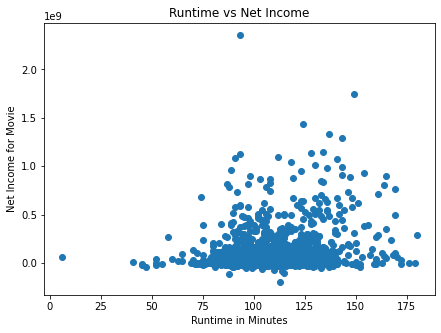

In [72]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x = title_and_revenue_df['runtime_minutes'],y = title_and_revenue_df['net_income'])
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Net Income for Movie')
ax.set_title('Runtime vs Net Income')
#plt.scatter(title_and_revenue_df['runtime_minutes'],title_and_revenue_df['gross_revenue']);

In [73]:
# Here I am taking a look at the rows where there wasa net loss
title_and_revenue_df.loc[title_and_revenue_df['net_income'] < 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.00000,42762350.00000,149762350.00000,-200237650.00000,tt6565702,Dark Phoenix,113.00000
9,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",275000000.00000,89302115.00000,260002115.00000,-14997885.00000,tt1210819,The Lone Ranger,150.00000
87,11,"May 12, 2017",King Arthur: Legend of the Sword,"$175,000,000","$39,175,066","$139,630,336",175000000.00000,39175066.00000,139630336.00000,-35369664.00000,tt1972591,King Arthur: Legend of the Sword,126.00000
88,12,"Dec 25, 2013",47 Ronin,"$175,000,000","$38,362,475","$151,716,815",175000000.00000,38362475.00000,151716815.00000,-23283185.00000,tt1335975,47 Ronin,128.00000
119,47,"Sep 30, 2016",Deepwater Horizon,"$156,000,000","$61,433,527","$122,603,824",156000000.00000,61433527.00000,122603824.00000,-33396176.00000,tt1860357,Deepwater Horizon,107.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,90,"Jun 19, 2014",The Past is a Grotesque Animal,"$100,000","$20,056","$20,056",100000.00000,20056.00000,20056.00000,-79944.00000,tt3072636,The Past is a Grotesque Animal,77.00000
2110,4,"Jul 25, 2014",Happy Christmas,"$70,000","$30,312","$30,312",70000.00000,30312.00000,30312.00000,-39688.00000,tt2955096,Happy Christmas,82.00000
2111,11,"Jan 25, 2013",Supporting Characters,"$60,000","$4,917","$4,917",60000.00000,4917.00000,4917.00000,-55083.00000,tt1874789,Supporting Characters,87.00000
2113,20,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",50000.00000,8374.00000,8374.00000,-41626.00000,tt4462082,Counting,111.00000


In [74]:
title_and_revenue_df.describe()

,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,runtime_minutes
count,1740.00000,1740.00000,1740.00000,1740.00000,1740.00000,1706.00000
mean,50.70632,42920351.54828,54319841.29425,133081666.47759,90161314.92931,106.46073
std,28.41175,53758287.50676,82264204.63192,229193306.12341,190190174.36410,18.07167
min,1.00000,9000.00000,388.00000,528.00000,-200237650.00000,6.00000
25%,26.75000,8500000.00000,5028910.75000,10174891.25000,-721611.75000,94.00000
50%,50.00000,23500000.00000,27198572.00000,48628471.00000,21491475.50000,104.00000
75%,75.00000,52125000.00000,64463437.00000,143601459.25000,91714147.25000,116.75000
max,100.00000,425000000.00000,760507625.00000,2776345279.00000,2351345279.00000,180.00000


In [75]:
#binning by standard deviation, which you can see above - 18 minutes

def length(val):
    if val <= 18:
        return "(>= 18)"
    elif (val > 18) and (val <= 36):
        return "(18 - 36)"
    elif(val > 36) and (val <= 54):
        return "(36 - 54)"
    elif (val > 54) and (val <= 72):
        return "(54 - 72)"
    elif (val > 72) and (val <= 90):
        return "(72 - 90)"
    elif (val > 90) and (val <= 108):
        return "(90 - 108)"
    elif (val > 108) and (val <= 126):
        return "(108 - 126)"
    elif (val > 126) and (val <= 144):
        return "(126 -144)"
    elif (val > 144) and (val <= 162):
        return "(144 - 162)"
    elif (val > 162) and (val <= 180):
        return "(162 - 180)"

In [76]:
# mapping runtime minutes to bins
title_and_revenue_df['runtime_minutes_binned'] = title_and_revenue_df['runtime_minutes'].map(length)

In [77]:
new_df = title_and_revenue_df.groupby(by=['runtime_minutes_binned'],as_index=False).mean()
new_df = new_df.sort_values(by='net_income',ascending=False)
new_df

,runtime_minutes_binned,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,runtime_minutes
2,(144 - 162),35.05882,102064705.88235,139116017.35294,388884976.14706,286820270.26471,152.08824
3,(162 - 180),53.83333,87816666.66667,98098157.61111,329489713.61111,241673046.94444,168.88889
1,(126 -144),49.34706,81714117.64706,106478653.09412,283995269.37059,202281151.72353,133.61176
0,(108 - 126),51.19868,47023620.30905,56654641.98013,129477695.90949,82454075.60044,116.08830
7,(90 - 108),52.33687,35079333.75332,44308464.24536,108489450.39125,73410116.63793,99.56499
8,(>= 18),43.00000,28000000.00000,67300955.00000,94500826.00000,66500826.00000,6.00000
6,(72 - 90),48.79762,25167274.23016,33508280.60714,74815011.08333,49647736.85317,85.52381
5,(54 - 72),40.94118,19884000.00000,28013480.23529,60696347.47059,40812347.47059,67.35294
4,(36 - 54),53.57143,22128571.42857,12035779.42857,17527091.00000,-4601480.42857,47.71429


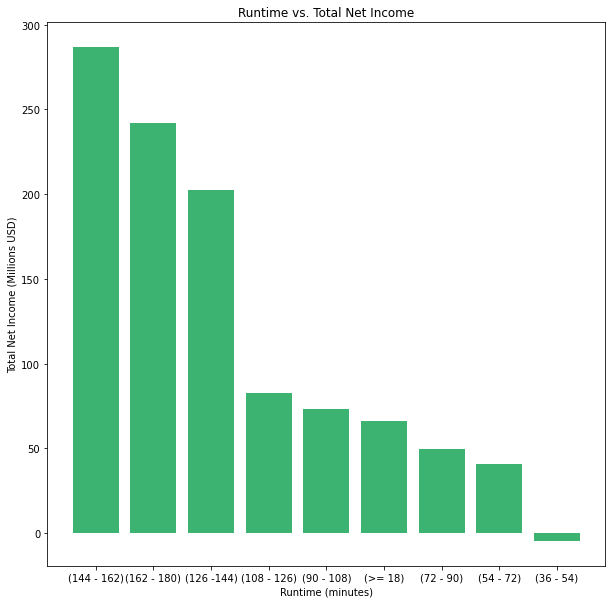

In [78]:
#plot these bins
fig,ax = plt.subplots(figsize = (10,10))
plt.ticklabel_format(style='plain')
ax.bar(new_df['runtime_minutes_binned'],new_df['net_income']/1000000,color='mediumseagreen')
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Total Net Income (Millions USD)')
ax.set_title('Runtime vs. Total Net Income')
plt.savefig("./charts_jpg/runtime_v_total_net_sales.jpg",bbox_inches='tight');

Director/Writer Analysis

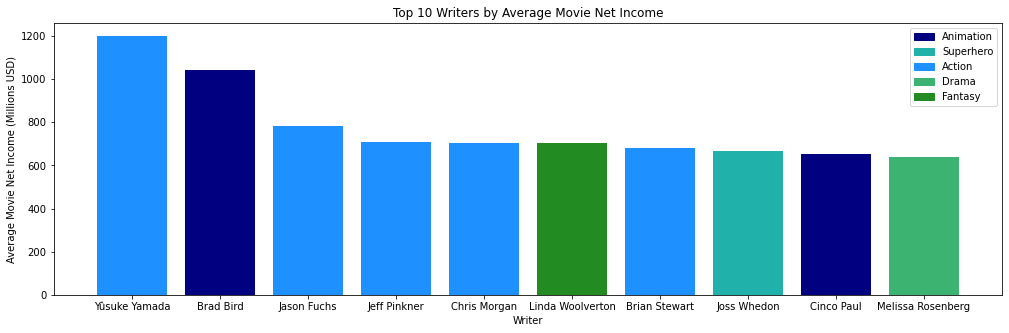

In [79]:
#Director/Writer Analysis Start:
fig,ax = plt.subplots(figsize=(17,5))
plt.ticklabel_format(style='plain')
ax.bar(new_writers['primary_name'],new_writers['net_income']/1000000,color=['dodgerblue','navy','dodgerblue','dodgerblue','dodgerblue','forestgreen','dodgerblue','lightseagreen','navy','mediumseagreen'])
ax.set_xlabel('Writer')
ax.set_ylabel('Average Movie Net Income (Millions USD)')
ax.set_title('Top 10 Writers by Average Movie Net Income')

colors = {'Animation':'navy', 'Superhero':'lightseagreen','Action':'dodgerblue','Drama':'mediumseagreen','Fantasy':'forestgreen'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);
plt.savefig("./charts_jpg/top_10_writers_avg_net_income.jpg",bbox_inches = "tight")

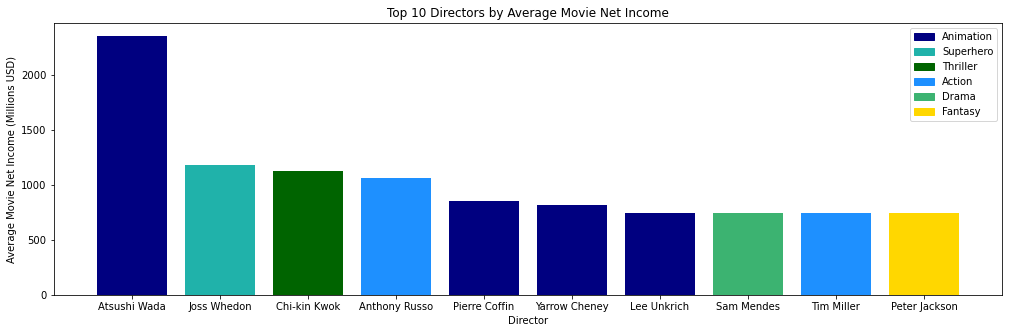

In [80]:
fig,ax = plt.subplots(figsize=(17,5))
plt.ticklabel_format(style='plain')
ax.bar(new_directors['primary_name'],new_directors['net_income']/1000000,color=['navy','lightseagreen','darkgreen','dodgerblue','navy','navy','navy','mediumseagreen','dodgerblue','gold'])
ax.set_xlabel('Director')
ax.set_ylabel('Average Movie Net Income (Millions USD)')
ax.set_title('Top 10 Directors by Average Movie Net Income');
colors = {'Animation':'navy', 'Superhero':'lightseagreen','Thriller':'darkgreen','Action':'dodgerblue','Drama':'mediumseagreen','Fantasy':'gold'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);
plt.savefig("./charts_jpg/top_10_directors_avg_movie_net_income.jpg",bbox_inches='tight')


Genre Data Analysis

In [81]:
#aggregate new dataframe by singular genres
genre_average_df = little_boy_df.groupby(by="singular_genres", as_index=False).mean()

In [82]:
#sort and save a series of dataframes so that graphs are produced with bars ordered by y-values
worldwide_gross = genre_average_df.sort_values(by="worldwide_gross", ascending=False)
domestic_gross = genre_average_df.sort_values(by="domestic_gross", ascending=False)
foreign_gross = genre_average_df.sort_values(by="foreign_market_gross", ascending=False)
worldwide_net = genre_average_df.sort_values(by="worldwide_net", ascending=False)
domestic_net = genre_average_df.sort_values(by="domestic_net", ascending=False)
foreign_net = genre_average_df.sort_values(by="foreign_market_net", ascending=False)

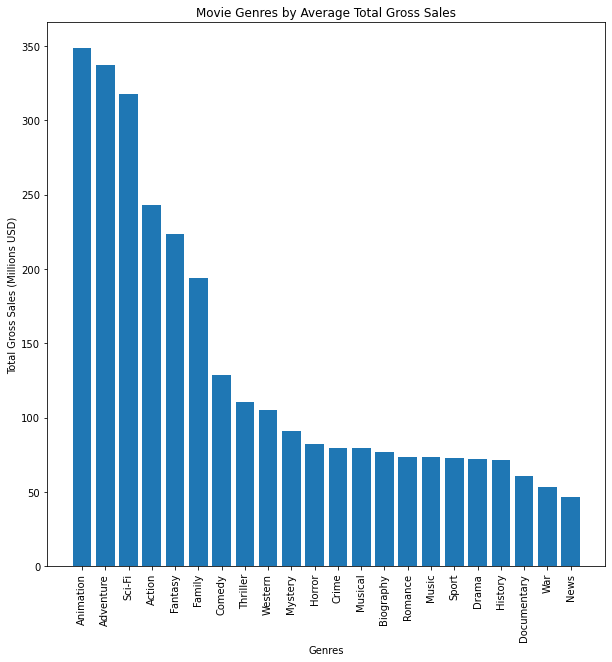

In [83]:
#graph of total gross sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))
plt.ticklabel_format(style='plain')

x = worldwide_gross["singular_genres"]
y = (worldwide_gross["worldwide_gross"]/1000000)

ax.bar(x,y)
ax.set_title("Movie Genres by Average Total Gross Sales")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Gross Sales (Millions USD)")
plt.xticks(rotation=90);
plt.savefig("./charts_jpg/movie_genres_avg_total_gross.jpg")

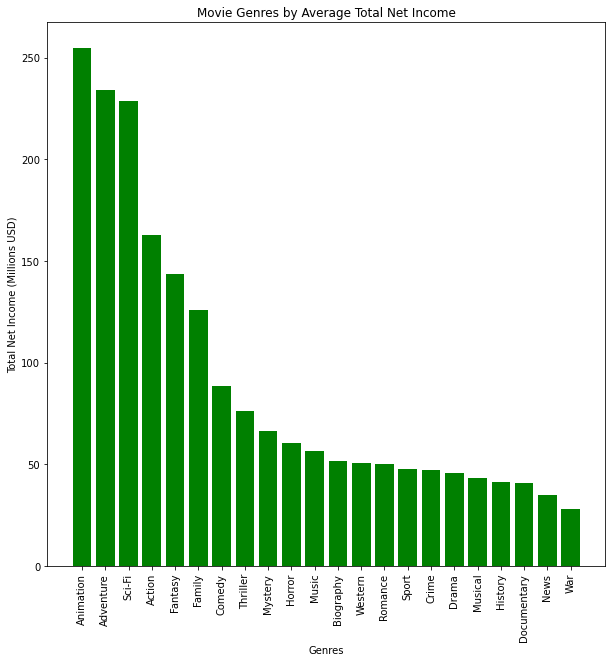

In [84]:
#graph of total net sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))
plt.ticklabel_format(style='plain')

x = worldwide_net["singular_genres"]
y = worldwide_net["worldwide_net"]/1000000

ax.bar(x,y,color='green')
ax.set_title("Movie Genres by Average Total Net Income")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Net Income (Millions USD)")
plt.xticks(rotation=90);
plt.savefig("./charts_jpg/movie_genres_avg_total_net.jpg")

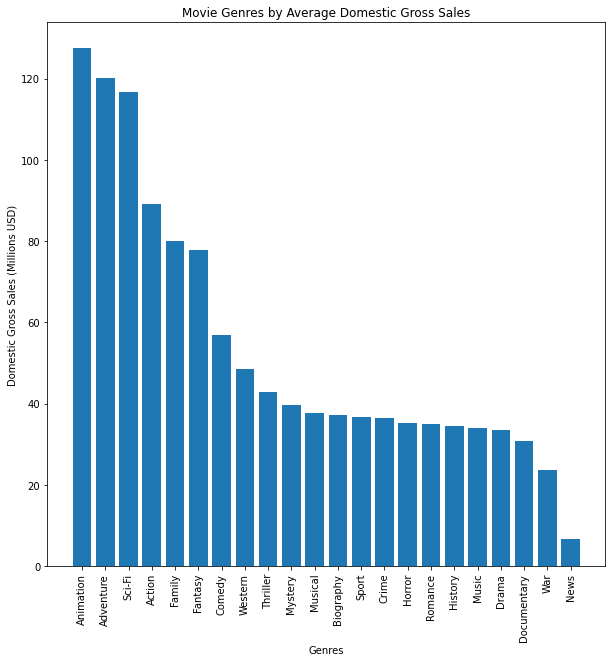

In [85]:
#graph of domestic gross sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))
plt.ticklabel_format(style='plain')

x = domestic_gross["singular_genres"]
y = domestic_gross["domestic_gross"]/1000000

ax.bar(x,y)
ax.set_title("Movie Genres by Average Domestic Gross Sales")
ax.set_xlabel("Genres")
ax.set_ylabel("Domestic Gross Sales (Millions USD)")
plt.xticks(rotation=90);
plt.savefig("./charts_jpg/movie_genres_avg_domestic_gross.jpg")

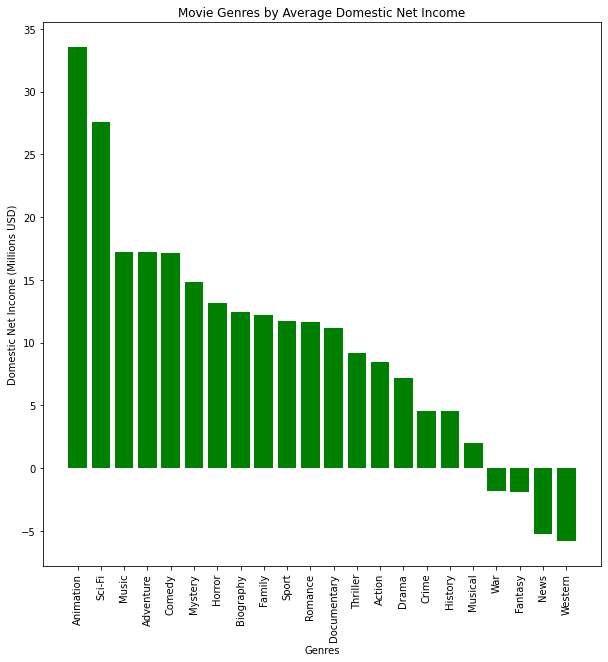

In [86]:
#graph of domestic net sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))
plt.ticklabel_format(style='plain')

x = domestic_net["singular_genres"]
y = domestic_net["domestic_net"]/1000000

ax.bar(x,y,color='green')
ax.set_title("Movie Genres by Average Domestic Net Income")
ax.set_xlabel("Genres")
ax.set_ylabel("Domestic Net Income (Millions USD)")
plt.xticks(rotation=90);
plt.savefig("./charts_jpg/movie_genres_avg_domestic_net.jpg")

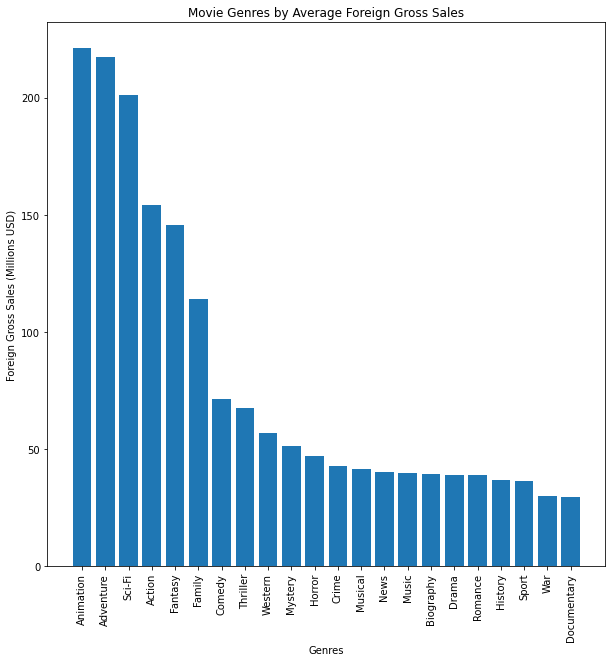

In [87]:
#graph of foreign gross sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))
plt.ticklabel_format(style='plain')

x = foreign_gross["singular_genres"]
y = foreign_gross["foreign_market_gross"]/1000000

ax.bar(x,y)
ax.set_title("Movie Genres by Average Foreign Gross Sales")
ax.set_xlabel("Genres")
ax.set_ylabel("Foreign Gross Sales (Millions USD)")
plt.xticks(rotation=90);
plt.savefig("./charts_jpg/movie_genres_avg_foreign_gross.jpg")

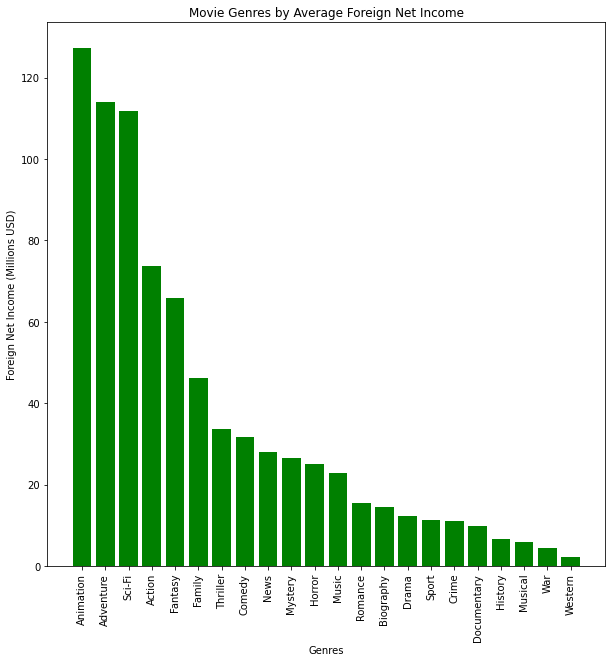

In [88]:
#graph of foreign net sales vs. genre
fig, ax = plt.subplots(figsize=(10,10))
plt.ticklabel_format(style='plain')

x = foreign_net["singular_genres"]
y = foreign_net["foreign_market_net"]/1000000

ax.bar(x,y,color='green')
ax.set_title("Movie Genres by Average Foreign Net Income")
ax.set_xlabel("Genres")
ax.set_ylabel("Foreign Net Income (Millions USD)")
plt.xticks(rotation=90);
plt.savefig("./charts_jpg/movie_genres_avg_foreign_net.jpg")

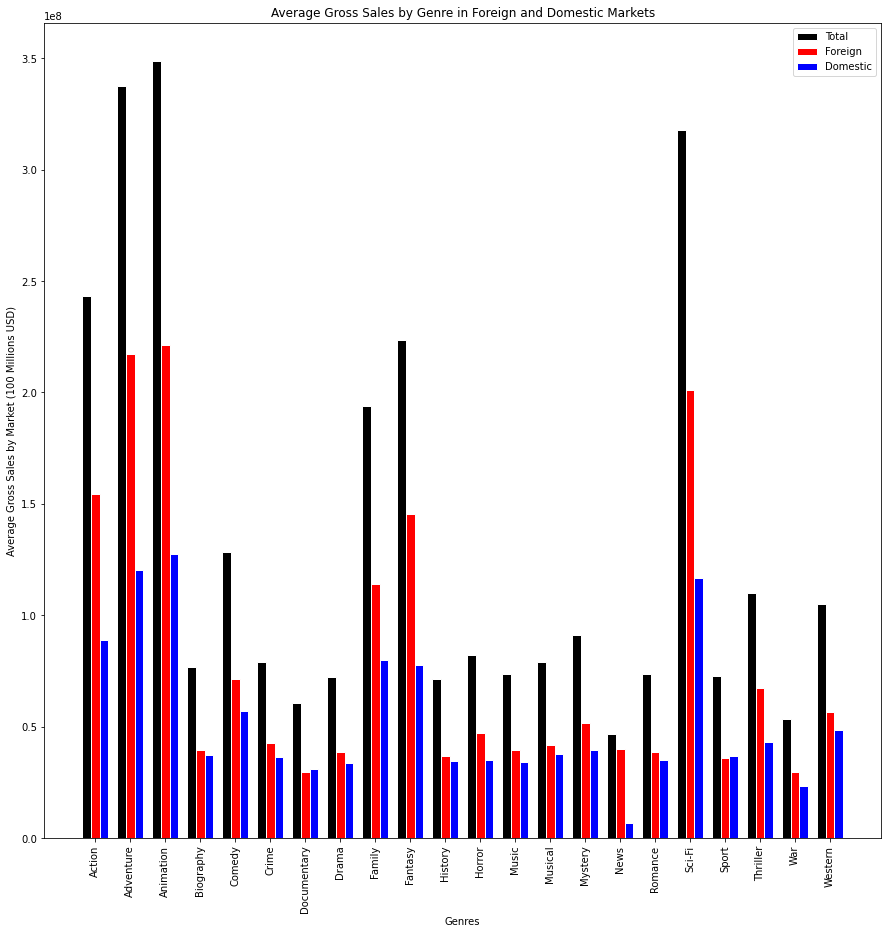

In [89]:
#Market performance comparison chart for gross revenues

#variables/data inputs
x = genre_average_df["singular_genres"]
bar1 = genre_average_df["worldwide_gross"]
bar2 = genre_average_df["foreign_market_gross"]
bar3 = genre_average_df["domestic_gross"]

#formatting
barwidth = 0.25
r1 = np.arange(len(bar1))
r2 = [z + barwidth for z in r1]
r3 = [z + barwidth for z in r2]

#creating the chart
fig = plt.subplots(figsize=(15,15))
plt.bar(r1, bar1, color='black', width=barwidth, edgecolor='white', label='Total')
plt.bar(r2, bar2, color='red', width=barwidth, edgecolor='white', label='Foreign')
plt.bar(r3, bar3, color='blue', width=barwidth, edgecolor='white', label='Domestic')
#labelling
plt.title("Average Gross Sales by Genre in Foreign and Domestic Markets")
plt.xlabel("Genres")
plt.ylabel("Average Gross Sales by Market (100 Millions USD)")
plt.xticks([a + barwidth for a in range(len(bar1))], x, rotation=90)
plt.legend();
plt.savefig("./charts_jpg/avg_gross_by_genre_multimkt.jpg")

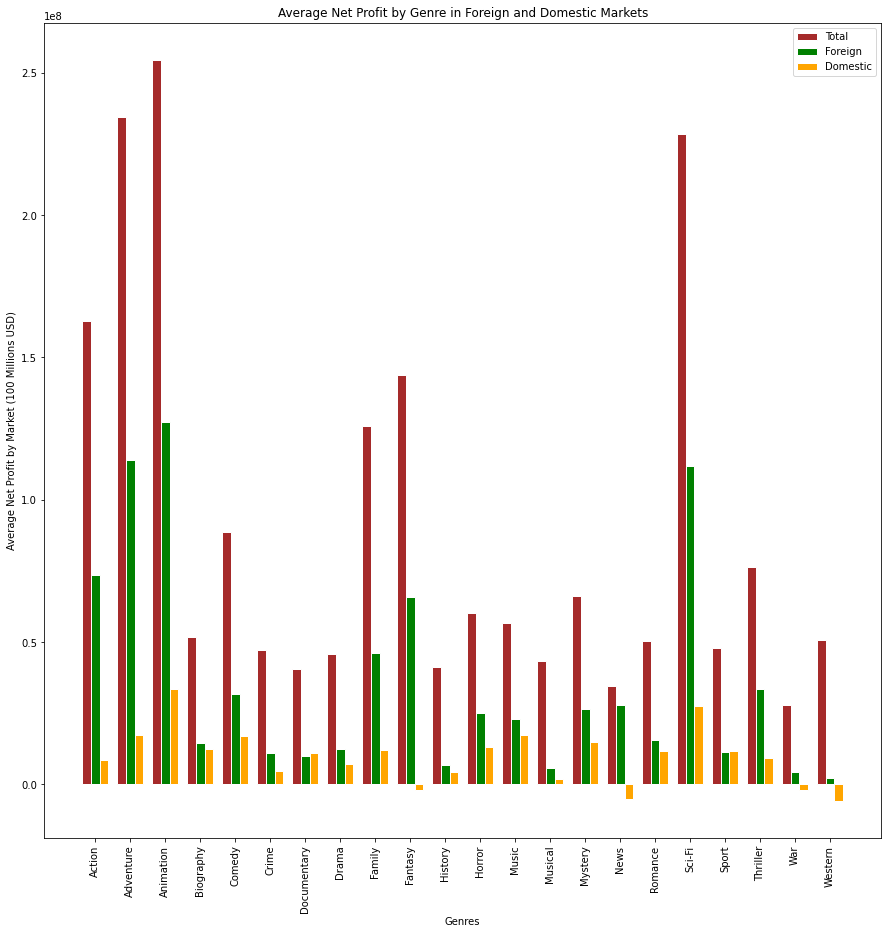

In [90]:
#Market performance comparison chart for net profits

#variables/data inputs
x = genre_average_df["singular_genres"]
bar1 = genre_average_df["worldwide_net"]
bar2 = genre_average_df["foreign_market_net"]
bar3 = genre_average_df["domestic_net"]

#formatting
barwidth = 0.25
r1 = np.arange(len(bar1))
r2 = [z + barwidth for z in r1]
r3 = [z + barwidth for z in r2]

#creating the chart
fig = plt.subplots(figsize=(15,15))
plt.bar(r1, bar1, color='brown', width=barwidth, edgecolor='white', label='Total')
plt.bar(r2, bar2, color='green', width=barwidth, edgecolor='white', label='Foreign')
plt.bar(r3, bar3, color='orange', width=barwidth, edgecolor='white', label='Domestic')
#labelling
plt.title("Average Net Profit by Genre in Foreign and Domestic Markets")
plt.xlabel("Genres")
plt.ylabel("Average Net Profit by Market (100 Millions USD)")
plt.xticks([a + barwidth for a in range(len(bar1))], x, rotation=90)
plt.legend();
plt.savefig("./charts_jpg/avg_net_by_genre_multimkt.jpg")

0.015579476932341407


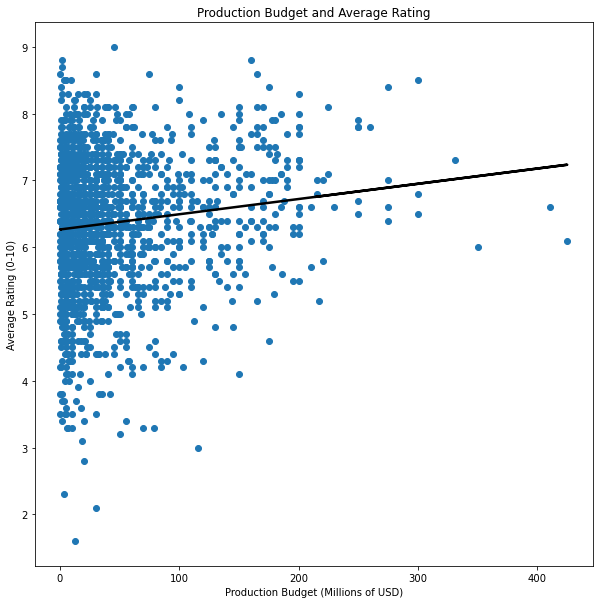

In [91]:
#scatter plot of budget(x) rating(y)
fig,ax = plt.subplots(figsize=(10,10))
x = movie_rating_budget_df["production_budget"]/1000000
y = movie_rating_budget_df["averagerating"]
ax.scatter(x,y)
ax.set_title("Production Budget and Average Rating")
ax.set_xlabel("Production Budget (Millions of USD)")
ax.set_ylabel("Average Rating (0-10)")
plt.ticklabel_format(style='plain')
#regression
m, b = np.polyfit(x,y, deg=1)
dist = np.linspace
ax.plot(x, m*x+b, color="k", lw=2.5);

#save figure
plt.savefig("./charts_jpg/budget_v_rating_scat.jpg")

#R^2 correlation metric
R2 = r2_score(y, m*x+b)
print(R2)

0.613785886022603


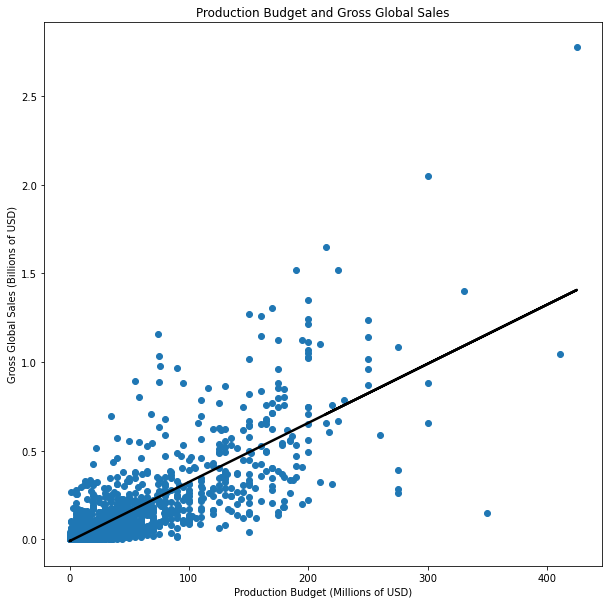

In [92]:
#scatter plot of budget(x) gross sales(y)
fig,ax = plt.subplots(figsize=(10,10))
x = movie_rating_budget_df["production_budget"]/1000000
y = movie_rating_budget_df["worldwide_gross"]/1000000000
ax.scatter(x,y)
ax.set_title("Production Budget and Gross Global Sales")
ax.set_xlabel("Production Budget (Millions of USD)")
ax.set_ylabel("Gross Global Sales (Billions of USD)")
plt.ticklabel_format(style='plain')
#regression
m, b = np.polyfit(x,y, deg=1)
dist = np.linspace
ax.plot(x, m*x+b, color="k", lw=2.5);

#save figure
plt.savefig("./charts_jpg/budget_v_gross__global_sales_scat.jpg")

#R^2 correlation metric
R2 = r2_score(y,m*x+b)
print(R2)

0.0032025216448912097


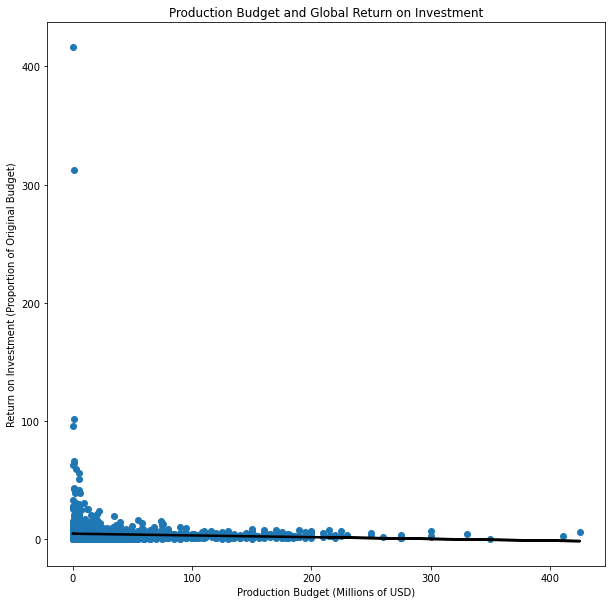

In [93]:
#scatter plot of budget(x) return on investment(y)
fig,ax = plt.subplots(figsize=(10,10))
x = movie_rating_budget_df["production_budget"]/1000000
y = movie_rating_budget_df["total_return_on_investment"]
ax.scatter(x,y)
ax.set_title("Production Budget and Global Return on Investment")
ax.set_xlabel("Production Budget (Millions of USD)")
ax.set_ylabel("Return on Investment (Proportion of Original Budget)")
plt.ticklabel_format(style='plain')
#regression
m, b = np.polyfit(x,y, deg=1)
dist = np.linspace
ax.plot(x, m*x+b, color="k", lw=2.5);

#save figure
plt.savefig("./charts_jpg/budget_v_roi_scat.jpg")

#R^2 correlation metric
R2 = r2_score(y,m*x+b)
print(R2)

0.4377091490124818


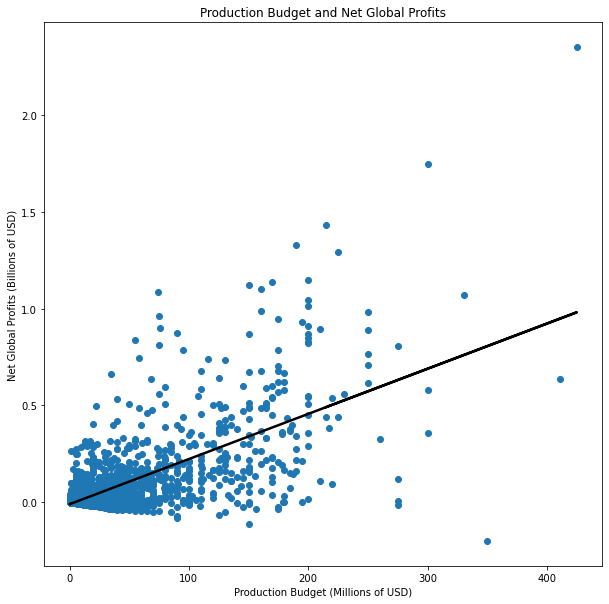

In [94]:
#scatter plot of budget(x) net profit(y)
fig,ax = plt.subplots(figsize=(10,10))
x = movie_rating_budget_df["production_budget"]/1000000
y = (movie_rating_budget_df["worldwide_gross"] - movie_rating_budget_df["production_budget"])/1000000000
ax.scatter(x,y)
ax.set_title("Production Budget and Net Global Profits")
ax.set_xlabel("Production Budget (Millions of USD)")
ax.set_ylabel("Net Global Profits (Billions of USD)")
plt.ticklabel_format(style='plain')
#regression
m, b = np.polyfit(x,y, deg=1)
dist = np.linspace
ax.plot(x, m*x+b, color="k", lw=2.5);

#save figure
plt.savefig("./charts_jpg/budget_v_net_profit_scat.jpg")

#R^2 correlation metric
R2 = r2_score(y,m*x+b)
print(R2)

0.04284030040880471


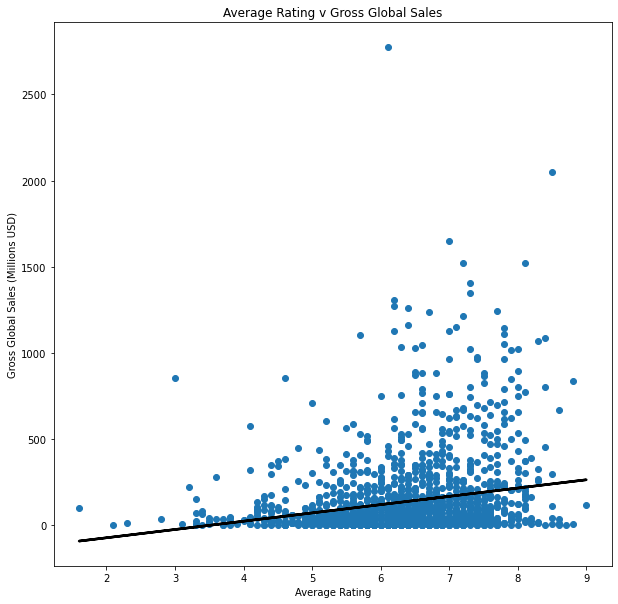

In [95]:
#scatter plot of rating(x) gross profits(y)
fig,ax = plt.subplots(figsize=(10,10))
x = movie_rating_budget_df["averagerating"]
y = movie_rating_budget_df["worldwide_gross"]/1000000
ax.scatter(x,y)
ax.set_title("Average Rating v Gross Global Sales")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Gross Global Sales (Millions USD)")
plt.ticklabel_format(style='plain')
#regression
m, b = np.polyfit(x,y, deg=1)
dist = np.linspace
ax.plot(x, m*x+b, color="k", lw=2.5);

#save figure
plt.savefig("./charts_jpg/rating_v_gross_global_sales_scat.jpg")

#R^2 correlation metric
R2 = r2_score(y, m*x+b)
print(R2)

# Conclusions

In conclusion, we recommend to create movies from 144 to 162 minutes and choose from the 10 writers and directors recommended.
Our data showed strong Markets in the Animation, Adventure, and Sci-Fi Genres and we recommend to diversify Markets to increase profitability.


# Next Steps

With more time, we would love to explore the relationships between writers and directors and the relationship between directors and genres. We would also like to examine the effects of various marketing methods.